In [2]:
import numpy as np
import pandas as pd
import json

########################SET folder to path of code directory in the project folder#####################
## SET PATH to code directory in the project folder
code_path = "C:\\Users\\evdoxiataka\\codes\\effi_user_study_2\\code\\"
import sys  
sys.path.insert(1, code_path)

########################SET folder to project directory path#####################
folder= "C:\\Users\\evdoxiataka\\codes\\effi_user_study_2\\"

from utils.utils import *
from utils.visualization import *

import matplotlib
import matplotlib.pyplot as plt

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

sensitive_attrs = ["CODE_GENDER","NAME_FAMILY_STATUS","AGE"]
all_attributes = list(attributes_names_mapping.keys())
all_attributes.remove("CODE_GENDER")
all_attributes.remove("NAME_FAMILY_STATUS")
all_attributes.remove("AGE")
sensitive_attrs = sensitive_attrs+all_attributes
fs = 0.5

##
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']

##
group_fair = ['DemographicParityRatio','AverageOddsDifference']
group_fair_codes = ['DPR','AOD']
indiv_fair = ['consistency',
'counterfactual_CODE_GENDER',
'counterfactual_AGE',
'counterfactual_NAME_FAMILY_STATUS']

# Global Model

## Labels_Unfair ('unfair') 

In [2]:
df_group_oneoff_ap = pd.read_csv(folder+'data\\results\\global\\Labels_Unfair\\group_fairness_global_Labels_Unfair.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data\\results\\global\\Labels_Unfair\\individual_fairness_global_Labels_Unfair.csv', delimiter=',')
df_acc_oneoff_ap = pd.read_csv(folder+'data\\results\\global\\Labels_Unfair\\accuracy_global_Labels_Unfair.csv', delimiter=',')

perc_change_df = get_percentage_change_oneoff(df_group_oneoff_ap, group_fair, 
                                              df_indiv, indiv_fair, 
                                              df_acc_oneoff_ap, 
                                              sensitive_attrs, fs)
##
perc_change_df.to_csv(folder+"data\\results\\global\\Labels_Unfair\\perc_change_global_Labels_Unfair.csv", index=False)
# perc_change_df

## Labels_Unfair+Weights ('unfair')

In [3]:
df_group_oneoff_ap = pd.read_csv(folder+'data\\results\\global\\Labels_Unfair+Weights\\group_fairness_global_Labels_Unfair+Weights.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data\\results\\global\\Labels_Unfair+Weights\\individual_fairness_global_Labels_Unfair+Weights.csv', delimiter=',')
df_acc_oneoff_ap = pd.read_csv(folder+'data\\results\\global\\Labels_Unfair+Weights\\accuracy_global_Labels_Unfair+Weights.csv', delimiter=',')

perc_change_df = get_percentage_change_oneoff(df_group_oneoff_ap, group_fair, 
                                              df_indiv, indiv_fair, 
                                              df_acc_oneoff_ap, 
                                              sensitive_attrs, fs)
##
perc_change_df.to_csv(folder+"data\\results\\global\\Labels_Unfair+Weights\\perc_change_global_Labels_Unfair+Weights.csv", index=False)
# perc_change_df

# Comparison to User Study 1

In [ ]:
labels_us1 = [-1.54,-2.18,-4.74,17.15,14.54,6.61]
labels_unfair_us2 = [-2,4.69,-7.5,16.75,-4.53,13.27]
labels_unfair_us1= [1.57,5.5,0.2,-9.56,-15.52,-4.67]
labels_weights_us2 = [-2.5,19.17,-6.51,6.39,-31.19,-19.21]
labels_weights_us1 = [0.06,-3.9,-5.77,-1.03,14.2,5.31]

import pandas
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(20, 6), layout="constrained")
fig.suptitle('IML (user study 2) vs. non-IML (user study 1) feedback: \n Global models')
# Make the plot
axes.plot([0,1,2,3,4,5],labels_this, color='blue',label='Labels')
axes.plot([0,1,2,3,4,5],labels_taka, color='orange',label='Labels Taka et. al.')
axes.plot([0,1,2,3,4,5],labels_unfair_this, color='blue',linestyle='dashed',label='Labels_Unfair')
axes.plot([0,1,2,3,4,5],labels_unfair_taka, color='orange',linestyle='dashed',label='Labels_Unfair Taka et. al.')
axes.plot([0,1,2,3,4,5],labels_weights_this, color='blue',linestyle='dashdot',label='Labels+Weights')
axes.plot([0,1,2,3,4,5],labels_weights_taka, color='orange',linestyle='dashdot',label='Labels+Weights Taka et. al.')
axes.plot([0,1,2,3,4,5],[0,0,0,0,0,0], color='black',lw=3)
# axes.set_ylim(-48,30)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['','Gender \n DPR (↑)', 'Marit. Status \n DPR (↑)','Age \n DPR (↑)','Gender \n AOD (↓)', 'Marit. Status \n AOD (↓)','Age \n AOD (↓)'])
# axes.legend()
axes.legend(bbox_to_anchor=(1., 1.05))
# axes.get_legend().remove()
##
file_name = 'global_comparisontoTaka.jpg'
fig.savefig(folder+"data\\results\\global\\"+file_name, dpi=300)
plt.show()

# Personalized Models

## Labels_Unfair

In [3]:
df_group = pd.read_csv(folder+'data\\results\\personalized\\Labels_Unfair\\group_fairness_personalized-Labels_Unfair_with_cma.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data\\results\\personalized\\Labels_Unfair\\individual_fairness_personalized-Labels_Unfair_with_cma.csv', delimiter=',')
df_acc = pd.read_csv(folder+'data\\results\\personalized\\Labels_Unfair\\accuracy_personalized-Labels_Unfair_with_cma.csv', delimiter=',')

perc_change_df,cma_perc_change_df_lu = get_percentage_change_IML(df_group, 
                                                                 group_fair, 
                                                                 df_indiv, 
                                                                 indiv_fair, 
                                                                 sensitive_attrs, 
                                                                 fs)
# perc_change_df.to_csv(folder+"data\\results\\personalized\\Labels_Unfair\\perc_change_personalized-Labels_Unfair_raw.csv", index=False)
cma_perc_change_df_lu.to_csv(folder+"data\\results\\personalized\\Labels_Unfair\\perc_change_personalized-Labels_Unfair_cma.csv", index=False)

p_ids = perc_change_df['participant_id'].tolist()

### Mean perc change of all personalized models

In [27]:
## get last cma point for each participant and then mean across participants
subdata=df_group[df_group['participant_id'].isin(df_group['participant_id'].unique()[1:].tolist())]
subdata=subdata[['Feature','iteration','participant_id','CMA_DemographicParityRatio','CMA_AverageOddsDifference']]
subdata=subdata[subdata['Feature'].isin(['AGE','CODE_GENDER','NAME_FAMILY_STATUS'])]
parts = subdata['participant_id'].unique().tolist()
df_part_data = pd.DataFrame()
for part in parts:
    part_data = subdata[subdata['participant_id']==part]
    last_iter = part_data['iteration'].unique().tolist()[-1]
    part_data_last_it = part_data[part_data['iteration']==last_iter]
    df_part_data = pd.concat([df_part_data,part_data_last_it])
df_part_data['CMA_counterfactual'] = [None]*len(df_part_data)
for idx in df_part_data.index:
    feat = df_part_data.loc[idx]['Feature']
    p_id = df_part_data.loc[idx]['participant_id']
    it = df_part_data.loc[idx]['iteration']
    sub_data = df_indiv[df_indiv['participant_id']==p_id]
    sub_data = sub_data[sub_data['iteration']==it]
    cf = sub_data['CMA_counterfactual_'+feat]
    df_part_data.at[idx,'CMA_counterfactual']=cf.tolist()[0]
print(df_part_data.groupby('Feature')[['CMA_DemographicParityRatio','CMA_AverageOddsDifference','CMA_counterfactual']].mean())

## baseline
baseline = df_group[df_group['participant_id'].isnull()]
baseline = baseline[baseline['Feature'].isin(['AGE','CODE_GENDER','NAME_FAMILY_STATUS'])]
baseline = baseline[['Feature','DemographicParityRatio','AverageOddsDifference']]

baseline_cf = df_indiv[df_indiv['participant_id'].isnull()]
baseline['CMA_counterfactual'] = [baseline_cf['counterfactual_AGE'].tolist()[0],
                                  baseline_cf['counterfactual_CODE_GENDER'].tolist()[0],
                                  baseline_cf['counterfactual_NAME_FAMILY_STATUS'].tolist()[0]]
##
pc_dpr_gender = ((df_part_data[df_part_data['Feature']=='CODE_GENDER']['CMA_DemographicParityRatio'].mean() - baseline[baseline['Feature']=='CODE_GENDER']['DemographicParityRatio'].tolist()[0])/baseline[baseline['Feature']=='CODE_GENDER']['DemographicParityRatio'].tolist()[0])*100
pc_dpr_maritstat = ((df_part_data[df_part_data['Feature']=='NAME_FAMILY_STATUS']['CMA_DemographicParityRatio'].mean() - baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['DemographicParityRatio'].tolist()[0])/baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['DemographicParityRatio'].tolist()[0])*100
pc_dpr_age = ((df_part_data[df_part_data['Feature']=='AGE']['CMA_DemographicParityRatio'].mean() - baseline[baseline['Feature']=='AGE']['DemographicParityRatio'].tolist()[0])/baseline[baseline['Feature']=='AGE']['DemographicParityRatio'].tolist()[0])*100

pc_aod_gender = ((df_part_data[df_part_data['Feature']=='CODE_GENDER']['CMA_AverageOddsDifference'].mean() - baseline[baseline['Feature']=='CODE_GENDER']['AverageOddsDifference'].tolist()[0])/baseline[baseline['Feature']=='CODE_GENDER']['AverageOddsDifference'].tolist()[0])*100
pc_aod_maritstat = ((df_part_data[df_part_data['Feature']=='NAME_FAMILY_STATUS']['CMA_AverageOddsDifference'].mean() - baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['AverageOddsDifference'].tolist()[0])/baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['AverageOddsDifference'].tolist()[0])*100
pc_aod_age = ((df_part_data[df_part_data['Feature']=='AGE']['CMA_AverageOddsDifference'].mean() - baseline[baseline['Feature']=='AGE']['AverageOddsDifference'].tolist()[0])/baseline[baseline['Feature']=='AGE']['AverageOddsDifference'].tolist()[0])*100

pc_cf_gender = ((df_part_data[df_part_data['Feature']=='CODE_GENDER']['CMA_counterfactual'].mean() - baseline[baseline['Feature']=='CODE_GENDER']['CMA_counterfactual'].tolist()[0])/baseline[baseline['Feature']=='CODE_GENDER']['CMA_counterfactual'].tolist()[0])*100
pc_cf_maritstat = ((df_part_data[df_part_data['Feature']=='NAME_FAMILY_STATUS']['CMA_counterfactual'].mean() - baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['CMA_counterfactual'].tolist()[0])/baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['CMA_counterfactual'].tolist()[0])*100
pc_cf_age = ((df_part_data[df_part_data['Feature']=='AGE']['CMA_counterfactual'].mean() - baseline[baseline['Feature']=='AGE']['CMA_counterfactual'].tolist()[0])/baseline[baseline['Feature']=='AGE']['CMA_counterfactual'].tolist()[0])*100

print('DPR GENDER', pc_dpr_gender, 'DPR Marit Stat', pc_dpr_maritstat, 'DPR AGE', pc_dpr_age, 
      'AOD GENDER', pc_aod_gender, 'AOD Marit Stat', pc_aod_maritstat, 'AOD AGE', pc_aod_age,
     'CF GENDER', pc_cf_gender, 'CF Marit Stat', pc_cf_maritstat, 'CF AGE', pc_cf_age)

                    CMA_DemographicParityRatio  CMA_AverageOddsDifference  \
Feature                                                                     
AGE                                   0.635615                   0.324061   
CODE_GENDER                           0.834610                   0.144830   
NAME_FAMILY_STATUS                    0.709716                   0.241501   

                   CMA_counterfactual  
Feature                                
AGE                          0.868167  
CODE_GENDER                  0.873145  
NAME_FAMILY_STATUS           0.930949  
DPR GENDER -1.4117177596063601 DPR Marit Stat -0.2948871589932154 DPR AGE -6.925668217622655 AOD GENDER 6.14103365751529 AOD Marit Stat -0.21376533126237382 AOD AGE -5.09535500976013 CF GENDER -1.0039969907500608 CF Marit Stat 1.300225700210913 CF AGE 2.180757323588903


### Cluster participants based on perc. change of group fairness measured at last iteration of CMA

In [ ]:
## df to array - keep only group fairness for clustering
clustered_data = []
for i in cma_perc_change_df_lu.index:
    clustered_data.append(cma_perc_change_df_lu.loc[i].tolist()[0:6])
metric = 'mean'

In [ ]:
## Search for optimal number of clusters
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]
silhouette_scores, best_score, best_grid = k_means_optimize_parameter(clustered_data, parameters, metric)
plot_silhouette_scores(silhouette_scores, parameters)

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', random_state=13, n_init='auto')
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(np.array(clustered_data)) 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(np.array(clustered_data))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
nc = 2
cluster_ids, cluster_centroids, array_of_vectors_pca = k_means_pca(clustered_data, nc, metric, n_components=2)
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
plot_clusters(array_of_vectors_pca, cluster_ids, colors)
##
cluster_p_id_dict = {}
for i, cl_id in enumerate(cluster_ids):
    color = 'cluster_'+str(cl_id)
    if color not in cluster_p_id_dict:
        cluster_p_id_dict[color] = []
    cluster_p_id_dict[color].append((i, p_ids[i]))
cluster_p_id_dict

In [ ]:
clustered_data_df = cma_perc_change_df_lu.copy(deep=True)
# clustered_data_df.drop(columns=['consistency_10','theil_index'],inplace=True)
clustered_data_df['cluster_id'] = cluster_ids
# for i,centroid in enumerate(cluster_centroids):
#     centroid = centroid.tolist()
#     centroid.append('centroid')
#     centroid.append(i)
#     clustered_data_df.loc[58+i] = centroid
# clustered_data_df.to_csv(folder+"data\\results\\personalized\\Labels_Unfair\\clustering\\"+"perc_change_personalized-Labels_Unfair_clustering_cma_group.csv", index=False)

In [ ]:
for cl in cluster_p_id_dict:
    print(cl,len(cluster_p_id_dict[cl]))

#### Line plots per cluster

In [ ]:
for cl in cluster_p_id_dict:
    title = 'personalized-Labels_Unfair_Clustering_CMA_Group_{}'.format(cl)
    filename = 'lineGraphs_personalized-Labels_Unfair_Clustering_CMA_Group_{}'.format(cl)
    image_type = '.jpeg'
    colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
    cl_participants = [p_id[1] for p_id in cluster_p_id_dict[cl]]
    cl_participants.append(np.nan)
    print(cl, cl_participants)
    joint_plot_all_participants(title, 
                                folder+"data\\results\\personalized\\Labels_Unfair\\clustering\\", 
                                filename, 
                                image_type, 
                                ['CODE_GENDER','NAME_FAMILY_STATUS','AGE'], 
                                group_fair, group_fair_codes, 
                                fs, 
                                df_group.loc[df_group['participant_id'].isin(cl_participants)],  
                                df_acc.loc[df_acc['participant_id'].isin(cl_participants)], 
                                colors, True, True)

#### Perc. change graphs per cluster

In [ ]:
## plot all fairness metrics
perc_ch_df = cma_perc_change_df_lu
cluster_df = clustered_data_df
title = 'personalized-Labels_Unfair Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels_Unfair_Clustering_CMA_Group_cl{}.jpg'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio', 'AverageOddsDifference']
group_fair_cod = ['DPR (↑)','AOD (↓)']

perc_change_plots_per_cluster(perc_ch_df, 
                              cluster_df, 
                              title, 
                              file_name, 
                              folder+"data\\results\\personalized\\Labels_Unfair\\clustering\\", 
                              attrs, attrs_codes, 
                              group_f, group_fair_cod)

#### Parallel Coordinate Graph

In [ ]:
cma_subset = cma_perc_change_df_lu[['CODE_GENDER_DemographicParityRatio',
                                    'NAME_FAMILY_STATUS_DemographicParityRatio',
                                    'AGE_DemographicParityRatio',
                                    'CODE_GENDER_AverageOddsDifference',
                                    'NAME_FAMILY_STATUS_AverageOddsDifference',
                                    'AGE_AverageOddsDifference']]
cma_subset['class'] = ['cluster '+str(cid) for cid in cluster_ids]

In [ ]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

fig, axes = plt.subplots(1, 1, figsize=(9, 5), layout="constrained")
fig.suptitle('personalized-Labels_Unfair')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', 
                          color=['tab:orange','tab:green','tab:blue','tab:red','tab:purple','tab:gray'],
                          ax=axes,lw=0.5)
ax.plot([0,1,2,3,4,5],[0,0,0,0,0,0], color='black',lw=3)
axes.set_ylabel('Perc. Ch. %')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 'Marit. Status \n DPR (↑)','Age \n DPR (↑)','Gender \n AOD (↓)', 'Marit. Status \n AOD (↓)','Age \n AOD (↓)'])
axes.legend(loc='upper left') 
##
file_name = 'parallelCoordGraph_personalized-Labels_Unfair_Clustering_CMA.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels_Unfair\\clustering\\"+file_name, dpi=300)
plt.show()

### Perc. change plot of all participants

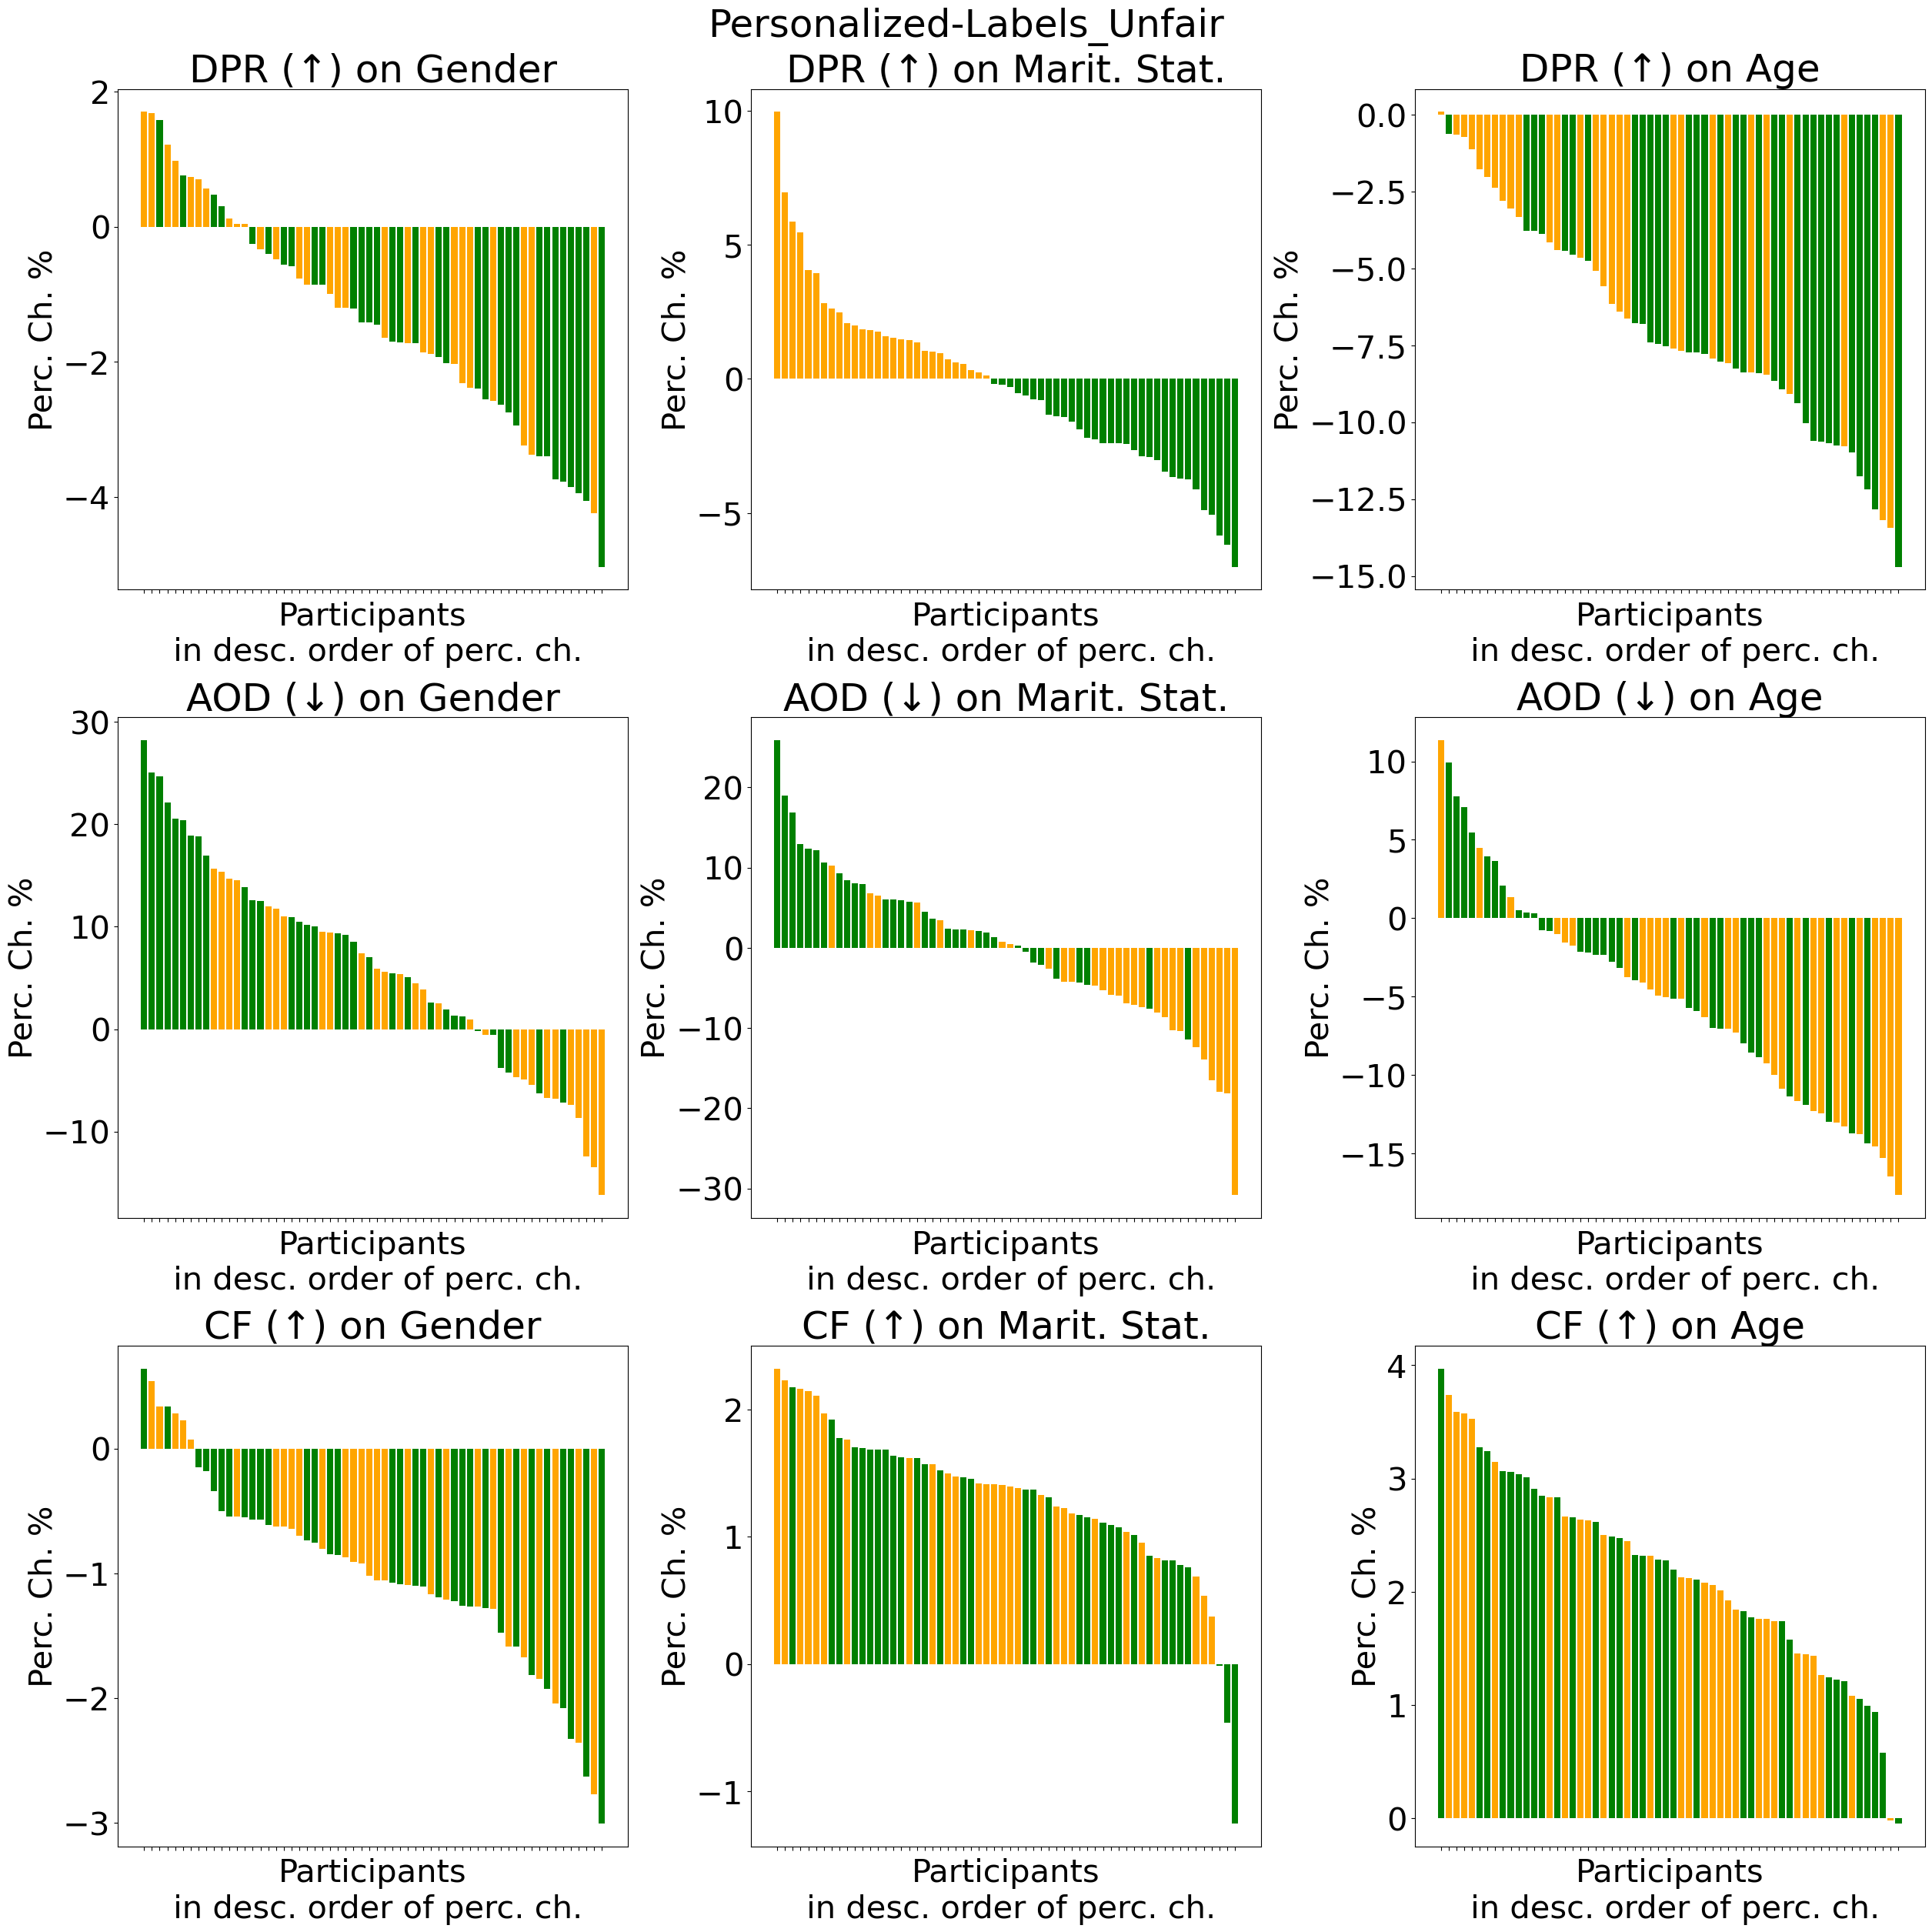

In [4]:
## plot perc. change plot for DPR and AOD
parts = cma_perc_change_df_lu[cma_perc_change_df_lu['NAME_FAMILY_STATUS_DemographicParityRatio']>0]['participant_id'].tolist()
colors = ['orange' if cma_perc_change_df_lu.loc[idx]['participant_id'] in parts else 'green' for idx in cma_perc_change_df_lu.index]
perc_ch_df = cma_perc_change_df_lu.copy()
perc_ch_df['color'] = colors
title = 'Personalized-Labels_Unfair'
file_name = 'percChange_Graphs_personalized-Labels_Unfair.jpg'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','AverageOddsDifference','counterfactual']
group_fair_cod = ['DPR (↑)','AOD (↓)', 'CF (↑)']

perc_change_plots(perc_ch_df, 
                  title, 
                  file_name, 
                  folder+"data\\results\\personalized\\Labels_Unfair\\figures\\", 
                  attrs, attrs_codes, 
                  group_f, group_fair_cod)

#### Parallel Coordinate

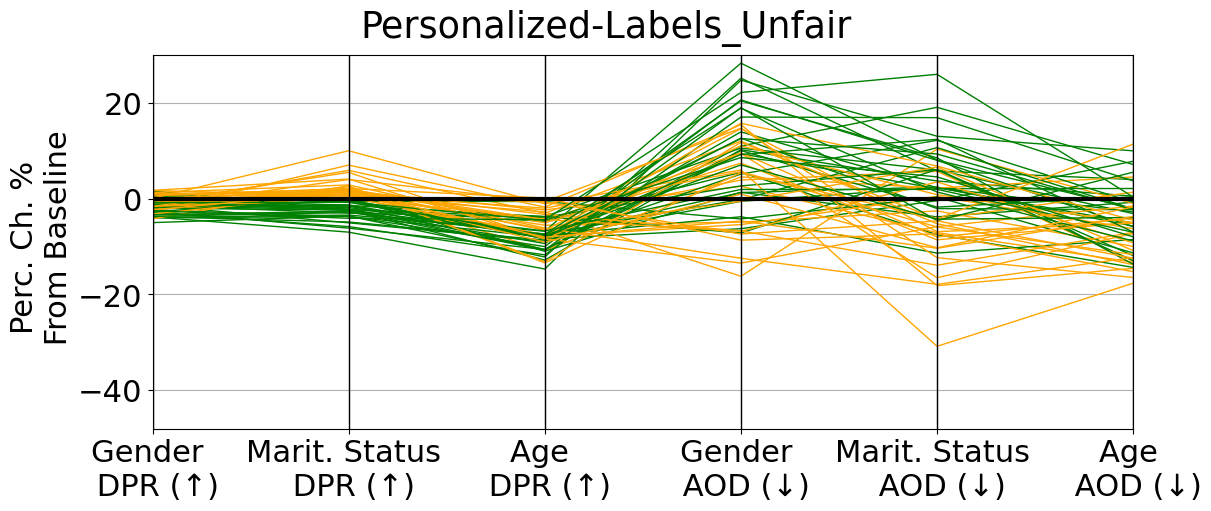

In [6]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

cma_subset = cma_perc_change_df_lu[['CODE_GENDER_DemographicParityRatio','NAME_FAMILY_STATUS_DemographicParityRatio','AGE_DemographicParityRatio','CODE_GENDER_AverageOddsDifference','NAME_FAMILY_STATUS_AverageOddsDifference','AGE_AverageOddsDifference']]
# cma_subset['class'] = [0]*len(cma_perc_change_df_lu)
parts = cma_perc_change_df_lu[cma_perc_change_df_lu['NAME_FAMILY_STATUS_DemographicParityRatio']>0]['participant_id'].tolist()
cma_subset['class']  = [0 if cma_perc_change_df_lu.loc[idx]['participant_id'] in parts else 'green' for idx in cma_perc_change_df_lu.index]

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(12, 5), layout="constrained")
fig.suptitle('Personalized-Labels_Unfair')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['green','orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5],[0,0,0,0,0,0], color='black',lw=3)
axes.set_ylim(-48,30)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 'Marit. Status \n DPR (↑)','Age \n DPR (↑)','Gender \n AOD (↓)', 'Marit. Status \n AOD (↓)','Age \n AOD (↓)'])
axes.get_legend().remove()
##
file_name = 'parallelCoordGraph_personalized-Labels_Unfair_CMA.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels_Unfair\\figures\\"+file_name, dpi=300)
plt.show()

In [ ]:
import seaborn as sns
df_cma_subset = cma_subset.loc[:,~cma_subset.columns.isin(['class'])]
df_cma_subset = df_cma_subset.rename(columns={'CODE_GENDER_DemographicParityRatio':'Gender \n DPR (↑)',
                              'NAME_FAMILY_STATUS_DemographicParityRatio':'Marit. Status \n DPR (↑)',
                              'AGE_DemographicParityRatio':'Age \n DPR (↑)',
                              'CODE_GENDER_AverageOddsDifference':'Gender \n AOD (↓)',
                              'NAME_FAMILY_STATUS_AverageOddsDifference':'Marit. Status \n AOD (↓)',
                              'AGE_AverageOddsDifference':'Age \n AOD (↓)'})

sns.pairplot(df_cma_subset,  corner=True)

### Line (Raw and CMA) plots

#### Joint plots for all participants

In [ ]:
title = 'Personalized-Labels_Unfair_all'
image_type = '.jpeg'
filename = 'all_participants'
joint_plot_all_participants(title, 
                            folder+"data\\results\\personalized\\Labels_Unfair\\figures\\", 
                            filename, 
                            image_type, 
                            ['CODE_GENDER','NAME_FAMILY_STATUS','AGE'], 
                            group_fair, group_fair_codes, 
                            fs, 
                            df_group, df_acc, 
                            colors, True, True)

#### Plots per participant

In [ ]:
title = 'Personalized-Labels_Unfair_{}'
image_type = '.jpeg'
plots_per_participant(title, 
                      folder+"data\\results\\personalized\\Labels_Unfair\\figures\\", 
                      image_type, 
                      ['CODE_GENDER','NAME_FAMILY_STATUS','AGE'], 
                      group_fair, group_fair_codes, 
                      fs, 
                      df_group, df_acc, 
                      colors, True)

#### Line graphs for DPR and AOD and 3 protected attributes for participant 608aa18a3c2dfd212a1a77a9 (personalized-Labels_Unfair)

In [ ]:
group_f = ['DemographicParityRatio','AverageOddsDifference']
group_fair_cod = ['DPR','AOD']
indiv_f = []
title = 'Personalized-Labels_Unfair_{}'
folder = ''
image_type = '.pdf'
line_graphs_of_participant(title, 
                           folder+"data\\results\\personalized\\Labels_Unfair\\figures\\", 
                           image_type, 
                      ['CODE_GENDER','NAME_FAMILY_STATUS','AGE'], 
                      group_f, group_fair_cod, 
                      fs, 
                      df_group, df_acc, 
                      colors, True, '608aa18a3c2dfd212a1a77a9')

## Labels_Unfair+Weights ('unfair')

In [5]:
df_group = pd.read_csv(folder+'data\\results\\personalized\\Labels_Unfair+Weights\\group_fairness_personalized-Labels_Unfair+Weights_with_cma.csv', delimiter=',')
df_indiv = pd.read_csv(folder+'data\\results\\personalized\\Labels_Unfair+Weights\\individual_fairness_personalized-Labels_Unfair+Weights_with_cma.csv', delimiter=',')
df_acc = pd.read_csv(folder+'data\\results\\personalized\\Labels_Unfair+Weights\\accuracy_personalized-Labels_Unfair+Weights_with_cma.csv', delimiter=',')

perc_change_df,cma_perc_change_df_lw = get_percentage_change_IML(df_group, 
                                                                 group_fair, 
                                                                 df_indiv, 
                                                                 indiv_fair, 
                                                                 sensitive_attrs, 
                                                                 fs)
# perc_change_df.to_csv(folder+"data\\results\\personalized\\Labels_Unfair+Weights\\perc_change_personalized-Labels_Unfair+Weights_raw.csv", index=False)
# cma_perc_change_df_lw.to_csv(folder+"data\\results\\personalized\\Labels_Unfair+Weights\\perc_change_personalized-Labels_Unfair+Weights_cma.csv", index=False)

p_ids = perc_change_df['participant_id'].tolist()

### Mean perc change of all personalized models

In [29]:
## get last cma point for each participant and then mean across participants
subdata=df_group[df_group['participant_id'].isin(df_group['participant_id'].unique()[1:].tolist())]
subdata=subdata[['Feature','iteration','participant_id','CMA_DemographicParityRatio','CMA_AverageOddsDifference']]
subdata=subdata[subdata['Feature'].isin(['AGE','CODE_GENDER','NAME_FAMILY_STATUS'])]
parts = subdata['participant_id'].unique().tolist()
df_part_data = pd.DataFrame()
for part in parts:
    part_data = subdata[subdata['participant_id']==part]
    last_iter = part_data['iteration'].unique().tolist()[-1]
    part_data_last_it = part_data[part_data['iteration']==last_iter]
    df_part_data = pd.concat([df_part_data,part_data_last_it])
df_part_data['CMA_counterfactual'] = [None]*len(df_part_data)
for idx in df_part_data.index:
    feat = df_part_data.loc[idx]['Feature']
    p_id = df_part_data.loc[idx]['participant_id']
    it = df_part_data.loc[idx]['iteration']
    sub_data = df_indiv[df_indiv['participant_id']==p_id]
    sub_data = sub_data[sub_data['iteration']==it]
    cf = sub_data['CMA_counterfactual_'+feat]
    df_part_data.at[idx,'CMA_counterfactual']=cf.tolist()[0]
print(df_part_data.groupby('Feature')[['CMA_DemographicParityRatio','CMA_AverageOddsDifference','CMA_counterfactual']].mean())

## baseline
baseline = df_group[df_group['participant_id'].isnull()]
baseline = baseline[baseline['Feature'].isin(['AGE','CODE_GENDER','NAME_FAMILY_STATUS'])]
baseline = baseline[['Feature','DemographicParityRatio','AverageOddsDifference']]

baseline_cf = df_indiv[df_indiv['participant_id'].isnull()]
baseline['CMA_counterfactual'] = [baseline_cf['counterfactual_AGE'].tolist()[0],
                                  baseline_cf['counterfactual_CODE_GENDER'].tolist()[0],
                                  baseline_cf['counterfactual_NAME_FAMILY_STATUS'].tolist()[0]]
##
pc_dpr_gender = ((df_part_data[df_part_data['Feature']=='CODE_GENDER']['CMA_DemographicParityRatio'].mean() - baseline[baseline['Feature']=='CODE_GENDER']['DemographicParityRatio'].tolist()[0])/baseline[baseline['Feature']=='CODE_GENDER']['DemographicParityRatio'].tolist()[0])*100
pc_dpr_maritstat = ((df_part_data[df_part_data['Feature']=='NAME_FAMILY_STATUS']['CMA_DemographicParityRatio'].mean() - baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['DemographicParityRatio'].tolist()[0])/baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['DemographicParityRatio'].tolist()[0])*100
pc_dpr_age = ((df_part_data[df_part_data['Feature']=='AGE']['CMA_DemographicParityRatio'].mean() - baseline[baseline['Feature']=='AGE']['DemographicParityRatio'].tolist()[0])/baseline[baseline['Feature']=='AGE']['DemographicParityRatio'].tolist()[0])*100

pc_aod_gender = ((df_part_data[df_part_data['Feature']=='CODE_GENDER']['CMA_AverageOddsDifference'].mean() - baseline[baseline['Feature']=='CODE_GENDER']['AverageOddsDifference'].tolist()[0])/baseline[baseline['Feature']=='CODE_GENDER']['AverageOddsDifference'].tolist()[0])*100
pc_aod_maritstat = ((df_part_data[df_part_data['Feature']=='NAME_FAMILY_STATUS']['CMA_AverageOddsDifference'].mean() - baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['AverageOddsDifference'].tolist()[0])/baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['AverageOddsDifference'].tolist()[0])*100
pc_aod_age = ((df_part_data[df_part_data['Feature']=='AGE']['CMA_AverageOddsDifference'].mean() - baseline[baseline['Feature']=='AGE']['AverageOddsDifference'].tolist()[0])/baseline[baseline['Feature']=='AGE']['AverageOddsDifference'].tolist()[0])*100

pc_cf_gender = ((df_part_data[df_part_data['Feature']=='CODE_GENDER']['CMA_counterfactual'].mean() - baseline[baseline['Feature']=='CODE_GENDER']['CMA_counterfactual'].tolist()[0])/baseline[baseline['Feature']=='CODE_GENDER']['CMA_counterfactual'].tolist()[0])*100
pc_cf_maritstat = ((df_part_data[df_part_data['Feature']=='NAME_FAMILY_STATUS']['CMA_counterfactual'].mean() - baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['CMA_counterfactual'].tolist()[0])/baseline[baseline['Feature']=='NAME_FAMILY_STATUS']['CMA_counterfactual'].tolist()[0])*100
pc_cf_age = ((df_part_data[df_part_data['Feature']=='AGE']['CMA_counterfactual'].mean() - baseline[baseline['Feature']=='AGE']['CMA_counterfactual'].tolist()[0])/baseline[baseline['Feature']=='AGE']['CMA_counterfactual'].tolist()[0])*100

print('DPR GENDER', pc_dpr_gender, 'DPR Marit Stat', pc_dpr_maritstat, 'DPR AGE', pc_dpr_age, 
      'AOD GENDER', pc_aod_gender, 'AOD Marit Stat', pc_aod_maritstat, 'AOD AGE', pc_aod_age,
     'CF GENDER', pc_cf_gender, 'CF Marit Stat', pc_cf_maritstat, 'CF AGE', pc_cf_age)

                    CMA_DemographicParityRatio  CMA_AverageOddsDifference  \
Feature                                                                     
AGE                                   0.644818                   0.318261   
CODE_GENDER                           0.838891                   0.143575   
NAME_FAMILY_STATUS                    0.712097                   0.235347   

                   CMA_counterfactual  
Feature                                
AGE                           0.86831  
CODE_GENDER                  0.875557  
NAME_FAMILY_STATUS           0.930034  
DPR GENDER -0.9059699380960646 DPR Marit Stat 0.03949484806036555 DPR AGE -5.578056609460344 AOD GENDER 5.221257797374315 AOD Marit Stat -2.7565234253019653 AOD AGE -6.7937412156692645 CF GENDER -0.7304867445317129 CF Marit Stat 1.2006858231909152 CF AGE 2.1975983609397534


### Cluster participants based on perc. change of group fairness measured at last iteration of CMA

In [ ]:
## df to array - keep only group fairness for clustering
clustered_data = []
for i in cma_perc_change_df_lw.index:
    clustered_data.append(cma_perc_change_df_lw.loc[i].tolist()[0:6])
metric = 'mean'

In [ ]:
## Search for optimal number of clusters
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45]
silhouette_scores, best_score, best_grid = k_means_optimize_parameter(clustered_data, parameters, metric)
plot_silhouette_scores(silhouette_scores, parameters)

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', random_state=13, n_init='auto')
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(np.array(clustered_data)) 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(np.array(clustered_data))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
nc = 2
cluster_ids, cluster_centroids, array_of_vectors_pca = k_means_pca(clustered_data, nc, metric, n_components=2)
colors = ['r','g','b','orange','purple', 'y','cyan','magenta','tab:blue']
plot_clusters(array_of_vectors_pca, cluster_ids, colors)
##
cluster_p_id_dict = {}
for i, cl_id in enumerate(cluster_ids):
    color = 'cluster_'+str(cl_id)
    if color not in cluster_p_id_dict:
        cluster_p_id_dict[color] = []
    cluster_p_id_dict[color].append((i, p_ids[i]))
cluster_p_id_dict

In [ ]:
clustered_data_df = cma_perc_change_df_lw.copy(deep=True)
# clustered_data_df.drop(columns=['consistency_10','theil_index'],inplace=True)
clustered_data_df['cluster_id'] = cluster_ids
# for i,centroid in enumerate(cluster_centroids):
#     centroid = centroid.tolist()
#     centroid.append('centroid')
#     centroid.append(i)
#     clustered_data_df.loc[len(clustered_data_df)-1+i] = centroid
# clustered_data_df.to_csv(folder+"data\\results\\personalized\\Labels+Weights\\clustering\\perc_change_personalized-Labels+Weights_clustering_cma_group.csv", index=False)
# # clustered_data_df.to_csv(folder+"data\\results\\personalized\\Labels+Weights\\clustering\\perc_change_personalized-Labels+Weights_Fair+Unfair_clustering_cma_group+indiv.csv", index=False)

In [ ]:
for cl in cluster_p_id_dict:
    print(cl,len(cluster_p_id_dict[cl]))

#### Line plots per cluster

In [ ]:
for cl in cluster_p_id_dict:
    title = 'personalized-Labels+Weights_CMA_{}'.format(cl)
    filename = cl
    image_type = '.jpeg'
    cl_participants = [p_id[1] for p_id in cluster_p_id_dict[cl]]
    cl_participants.append(np.nan)
    print(cl, cl_participants)
    joint_plot_all_participants(title, 
                                folder+"data\\results\\personalized\\Labels+Weights\\clustering\\", 
                                filename, 
                                image_type, 
                                ['CODE_GENDER','NAME_FAMILY_STATUS','AGE'], 
                                group_fair, group_fair_codes, 
                                fs, 
                                df_group.loc[df_group['participant_id'].isin(cl_participants)], 
                                df_acc.loc[df_acc['participant_id'].isin(cl_participants)], 
                                colors, True, True)

#### Perc. change graphs per cluster

In [ ]:
## plot all fairness metrics
perc_ch_df = cma_perc_change_df_lw
cluster_df = clustered_data_df
title = 'personalized-Labels+Weights Cluster {}'
file_name = 'percChange_Graphs_personalized-Labels+Weights_Clustering_CMA_Group_cl{}.jpg'
##
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','AverageOddsDifference']
group_fair_cod = ['DPR (↑)','AOD (↓)']

perc_change_plots_per_cluster(perc_ch_df, 
                              cluster_df, 
                              title, 
                              file_name, 
                              folder+"data\\results\\personalized\\Labels+Weights\\clustering\\", 
                              attrs, attrs_codes, group_f, group_fair_cod)

#### Parallel Coordinate Graph

In [ ]:
cma_subset = cma_perc_change_df_lw[['CODE_GENDER_DemographicParityRatio',
                                    'NAME_FAMILY_STATUS_DemographicParityRatio',
                                    'AGE_DemographicParityRatio',
                                    'CODE_GENDER_AverageOddsDifference',
                                    'NAME_FAMILY_STATUS_AverageOddsDifference',
                                    'AGE_AverageOddsDifference']]
cma_subset['class'] = ['cluster '+str(cid) for cid in cluster_ids]

In [ ]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

matplotlib.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(1, 1, figsize=(9, 5), layout="constrained")
fig.suptitle('personalized-Labels+Weights')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['tab:orange','tab:green','tab:blue','tab:red'],ax=axes,lw=0.5)
ax.plot([0,1,2,3,4,5],[0,0,0,0,0,0], color='black',lw=3)
axes.set_ylabel('Perc. Ch. %')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 
                           'Marit. Status \n DPR (↑)',
                           'Age \n DPR (↑)',
                           'Gender \n AOD (↓)', 
                           'Marit. Status \n AOD (↓)',
                           'Age \n AOD (↓)'])
axes.legend(loc='upper left') 
##
file_name = 'parallelCoordGraph_personalized-Labels+Weights_Clustering_CMA.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels+Weights\\clustering\\"+file_name, dpi=300)
plt.show()

In [ ]:
fig, ax2 = plt.subplots(1, 1, figsize=(9, 9), layout="constrained")
fig.suptitle('personalized-Labels+Weights')
pd.plotting.scatter_matrix(cma_subset, ax=ax2)

### Perc. change plot of all participants

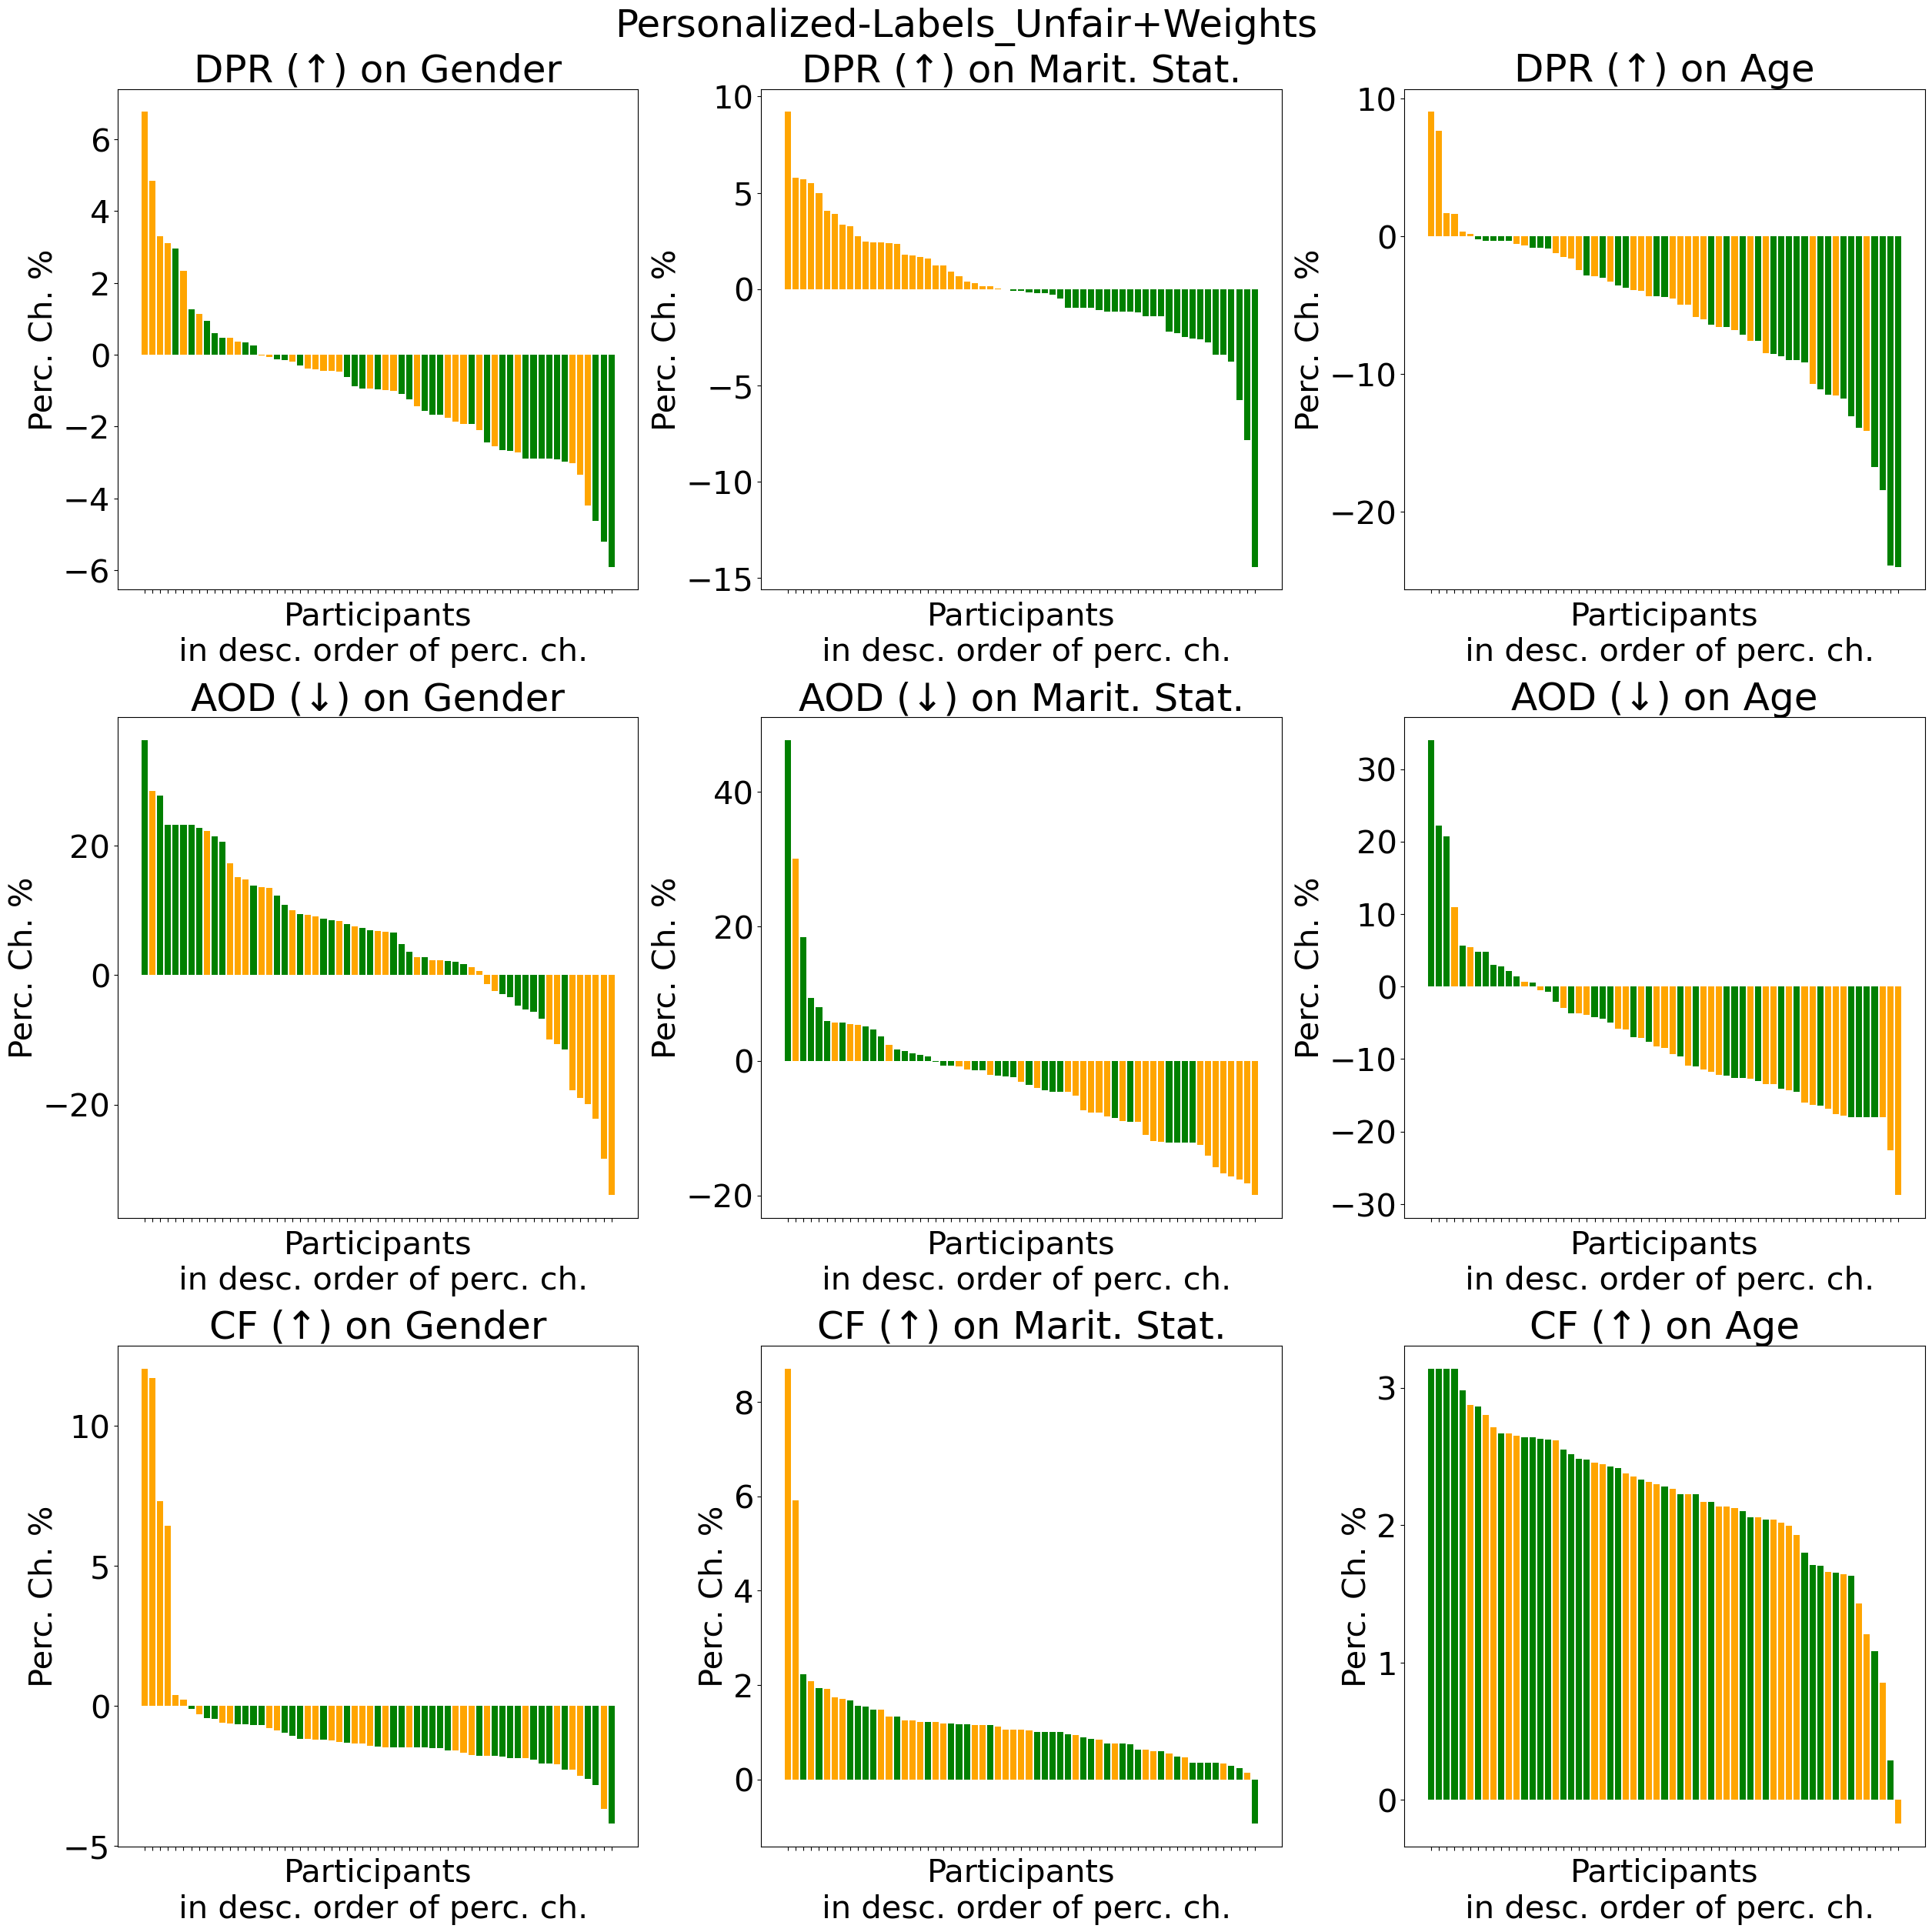

In [6]:
## plot perc. change plot for all fairness metrics
parts = cma_perc_change_df_lw[cma_perc_change_df_lw['NAME_FAMILY_STATUS_DemographicParityRatio']>0]['participant_id'].tolist()
colors = ['orange' if cma_perc_change_df_lw.loc[idx]['participant_id'] in parts else 'green' for idx in cma_perc_change_df_lw.index]
perc_ch_df = cma_perc_change_df_lw.copy()
perc_ch_df['color'] = colors
title = 'Personalized-Labels_Unfair+Weights'
file_name = 'percChange_Graphs_personalized-Labels_Unfair+Weights.jpg'
attrs  = ['CODE_GENDER','NAME_FAMILY_STATUS','AGE']
attrs_codes = ['Gender','Marit. Stat.','Age']
group_f = ['DemographicParityRatio','AverageOddsDifference','counterfactual']
group_fair_cod = ['DPR (↑)','AOD (↓)','CF (↑)']

perc_change_plots(perc_ch_df, 
                  title, 
                  file_name, 
                  folder+"data\\results\\personalized\\Labels_Unfair+Weights\\figures\\", 
                  attrs, attrs_codes, 
                  group_f, group_fair_cod)

#### Parallel Coordinate

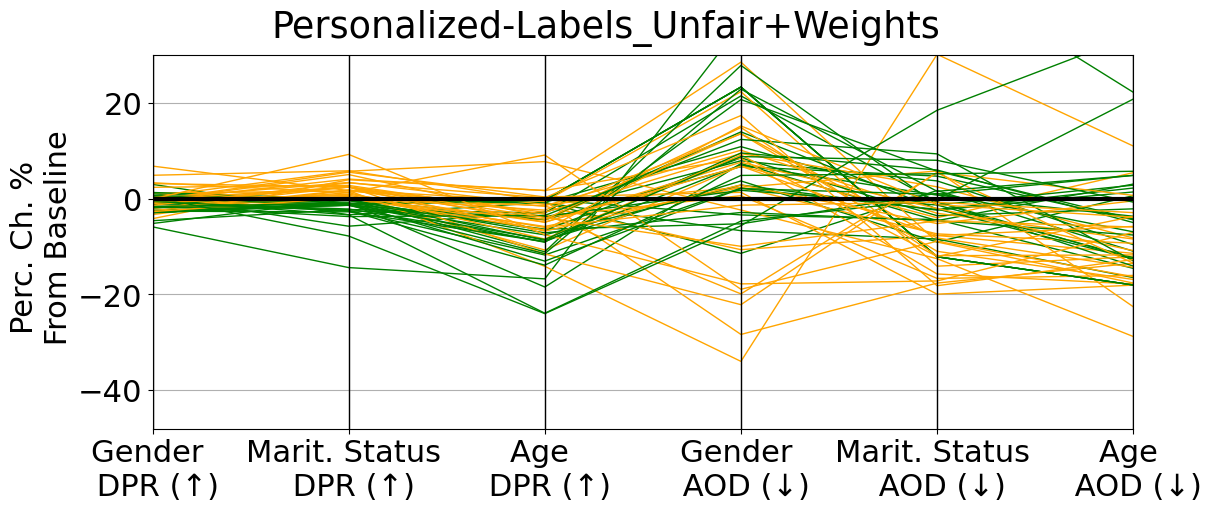

In [8]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

cma_subset = cma_perc_change_df_lw[['CODE_GENDER_DemographicParityRatio',
                                 'NAME_FAMILY_STATUS_DemographicParityRatio',
                                 'AGE_DemographicParityRatio',
                                 'CODE_GENDER_AverageOddsDifference',
                                 'NAME_FAMILY_STATUS_AverageOddsDifference',
                                 'AGE_AverageOddsDifference']]
# cma_subset['class'] = [0]*len(cma_perc_change_df_lw)
parts = cma_perc_change_df_lw[cma_perc_change_df_lw['NAME_FAMILY_STATUS_DemographicParityRatio']>0]['participant_id'].tolist()
cma_subset['class']  = [0 if cma_perc_change_df_lw.loc[idx]['participant_id'] in parts else 'green' for idx in cma_perc_change_df_lw.index]

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(12, 5), layout="constrained")
fig.suptitle('Personalized-Labels_Unfair+Weights')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['green','orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5],[0,0,0,0,0,0], color='black',lw=3)
axes.set_ylim(-48,30)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 'Marit. Status \n DPR (↑)','Age \n DPR (↑)','Gender \n AOD (↓)', 'Marit. Status \n AOD (↓)','Age \n AOD (↓)'])
axes.get_legend().remove()
##
file_name = 'parallelCoordGraph_personalized-Labels_Unfair+Weights_CMA.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels_Unfair+Weights\\figures\\"+file_name, dpi=300)
plt.show()

In [ ]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

cma_subset = cma_perc_change_df_lw[['CODE_GENDER_DemographicParityRatio',
                                 'NAME_FAMILY_STATUS_DemographicParityRatio',
                                 'AGE_DemographicParityRatio',
                                 'CODE_GENDER_AverageOddsDifference',
                                 'NAME_FAMILY_STATUS_AverageOddsDifference',
                                 'AGE_AverageOddsDifference']]
# cma_subset['class'] =[0 if cma_subset.loc[idx]['NAME_FAMILY_STATUS_AverageOddsDifference']>0 else 1 for idx in cma_subset.index]
cma_subset['class'] =[0 if cma_subset.loc[idx]['AGE_AverageOddsDifference']>0 else 1 for idx in cma_subset.index]
# cma_subset['class'] =[0 if cma_subset.loc[idx]['NAME_FAMILY_STATUS_DemographicParityRatio']>0 else 1 for idx in cma_subset.index]

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(12, 5), layout="constrained")
fig.suptitle('Personalized-Labels_Unfair+Weights')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['tab:orange','tab:green'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5],[0,0,0,0,0,0], color='black',lw=3)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 'Marit. Status \n DPR (↑)','Age \n DPR (↑)',
                           'Gender \n AOD (↓)', 'Marit. Status \n AOD (↓)','Age \n AOD (↓)'])
axes.get_legend().remove()
##
file_name = 'parallelCoordGraph_personalized-Labels_Unfair+Weights_CMA_ageAOD.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels_Unfair+Weights\\figures\\"+file_name, dpi=300)
plt.show()

In [ ]:
import seaborn as sns
df_cma_subset = cma_subset.loc[:,~cma_subset.columns.isin(['class'])]
df_cma_subset = df_cma_subset.rename(columns={'CODE_GENDER_DemographicParityRatio':'Gender \n DPR (↑)',
                              'NAME_FAMILY_STATUS_DemographicParityRatio':'Marit. Status \n DPR (↑)',
                              'AGE_DemographicParityRatio':'Age \n DPR (↑)',
                              'CODE_GENDER_AverageOddsDifference':'Gender \n AOD (↓)',
                              'NAME_FAMILY_STATUS_AverageOddsDifference':'Marit. Status \n AOD (↓)',
                              'AGE_AverageOddsDifference':'Age \n AOD (↓)'})

sns.pairplot(df_cma_subset,  corner=True)

### Line (Raw and CMA) plots

#### Joint plots for all participants

In [ ]:
title = 'Personalized-Labels_Unfair+Weights_Fair+Unfair_all'
image_type = '.jpeg'
filename = 'all_participants'
joint_plot_all_participants(title, 
                            folder+"data\\results\\personalized\\Labels_Unfair+Weights\\figures\\", 
                            filename, 
                            image_type, 
                            ['CODE_GENDER','NAME_FAMILY_STATUS','AGE'], 
                            group_fair, group_fair_codes, 
                            fs, 
                            df_group, df_acc, 
                            colors, True, True)

#### Plots per participant

In [ ]:
title = 'Personalized-Labels_Unfair+Weights_{}'
image_type = '.jpeg'
plots_per_participant(title, 
                      folder+"data\\results\\personalized\\Labels_Unfair+Weights\\figures\\", 
                      image_type, 
                      ['CODE_GENDER','NAME_FAMILY_STATUS','AGE'], 
                      group_fair, group_fair_codes, 
                      fs, 
                      df_group, df_acc, 
                      colors, True)

# Analysis of data from participants who reported different notions of fairness in pre-questionnaire

In [9]:
questionnaires = pd.read_csv(folder+'data\\processed_data\\QuestionnairesResponses.csv', delimiter=',')

In [10]:
consist_p_ids = questionnaires[questionnaires['PreQ3']=="Similar people will be treated in the same way"]['Participant_ID'].tolist()
counterf_p_ids = questionnaires[questionnaires['PreQ3']=="People will be treated the same whether they are protected by law (e.g. gender, age, etc.) or not"]['Participant_ID'].tolist()

### Personalized_Labels_Unfair

#### Parallel Coordinate Consistency ("Similar people will be treated in the same way")

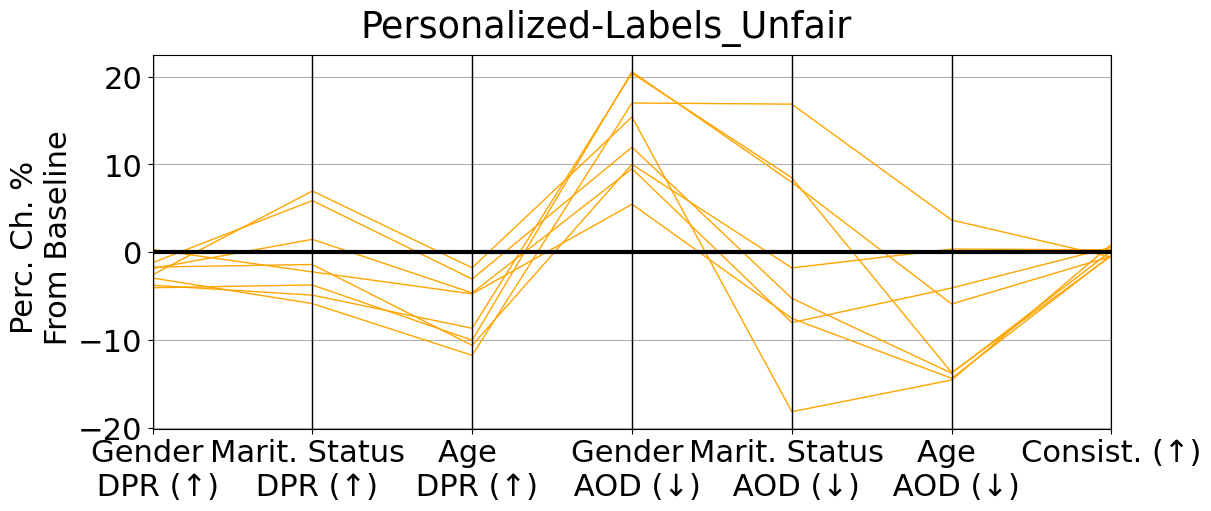

In [11]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
cma_subset = cma_perc_change_df_lu.loc[cma_perc_change_df_lu['participant_id'].isin(consist_p_ids)]
cma_subset = cma_subset[['CODE_GENDER_DemographicParityRatio',
                                    'NAME_FAMILY_STATUS_DemographicParityRatio',
                                    'AGE_DemographicParityRatio',
                                    'CODE_GENDER_AverageOddsDifference',
                                    'NAME_FAMILY_STATUS_AverageOddsDifference',
                                    'AGE_AverageOddsDifference',
                                   'consistency']]
cma_subset['class'] = [0]*len(cma_subset)

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(12, 5), layout="constrained")
fig.suptitle('Personalized-Labels_Unfair')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5,6],[0,0,0,0,0,0,0], color='black',lw=3)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 
                           'Marit. Status \n DPR (↑)',
                           'Age \n DPR (↑)',
                           'Gender \n AOD (↓)', 
                           'Marit. Status \n AOD (↓)',
                           'Age \n AOD (↓)',
                          'Consist. (↑)'])
axes.get_legend().remove()
##
file_name = 'parallelCoordGraph_consistency_personalized-Labels_Unfair_CMA.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels_Unfair\\figures\\"+file_name, dpi=300)
plt.show()

#### Parallel Coordinate Counterfactual ("People will be treated the same whether they are protected by law (e.g. gender, age, etc.) or not")

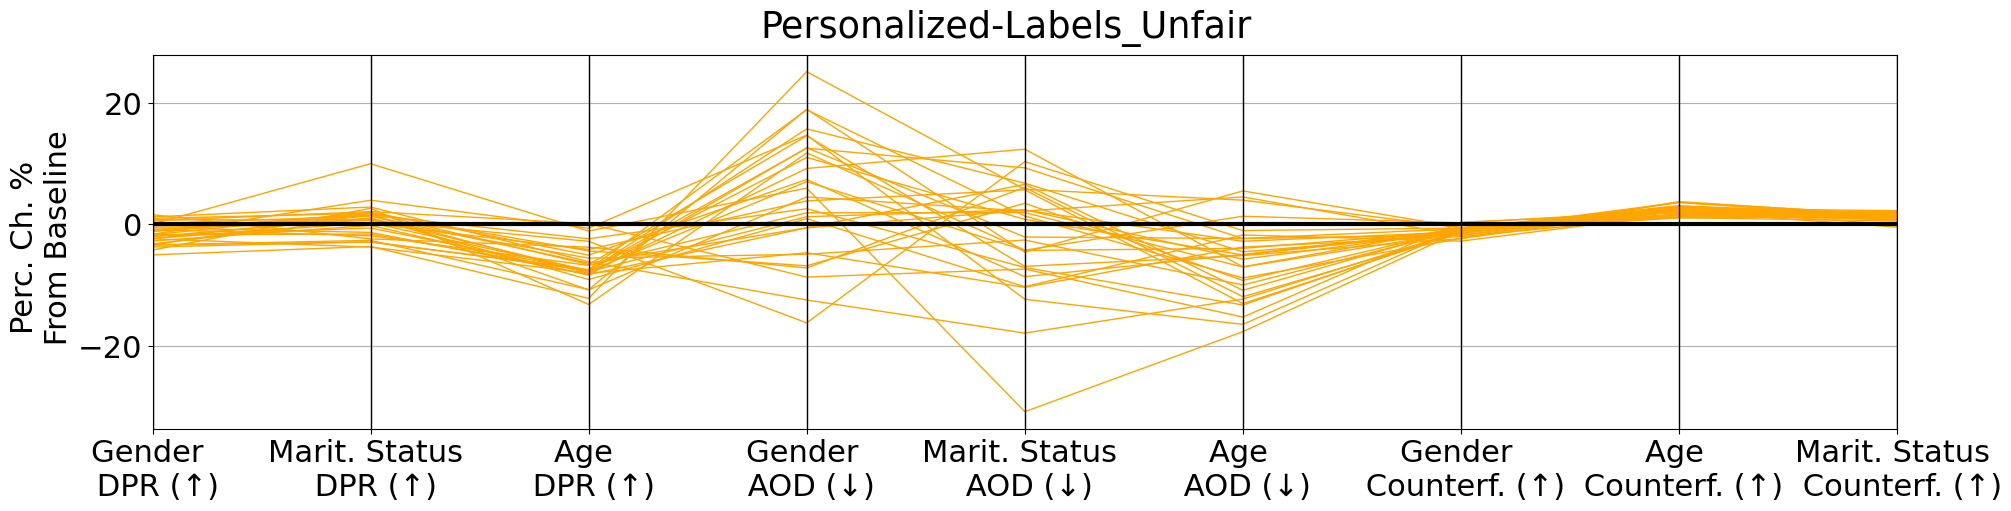

In [12]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

cma_subset = cma_perc_change_df_lu.loc[cma_perc_change_df_lu['participant_id'].isin(counterf_p_ids)]
cma_subset = cma_subset[['CODE_GENDER_DemographicParityRatio',
                                    'NAME_FAMILY_STATUS_DemographicParityRatio',
                                    'AGE_DemographicParityRatio',
                                    'CODE_GENDER_AverageOddsDifference',
                                    'NAME_FAMILY_STATUS_AverageOddsDifference',
                                    'AGE_AverageOddsDifference',
                                   'counterfactual_CODE_GENDER',
                                   'counterfactual_AGE',
                                   'counterfactual_NAME_FAMILY_STATUS']]
cma_subset['class'] = [0]*len(cma_subset)

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(20, 5), layout="constrained")
fig.suptitle('Personalized-Labels_Unfair')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5,6,7,8],[0,0,0,0,0,0,0,0,0], color='black',lw=3)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 
                           'Marit. Status \n DPR (↑)',
                           'Age \n DPR (↑)',
                           'Gender \n AOD (↓)', 
                           'Marit. Status \n AOD (↓)',
                           'Age \n AOD (↓)',
                          'Gender \n Counterf. (↑)',
                          'Age \n Counterf. (↑)',
                          'Marit. Status \n Counterf. (↑)'])
axes.get_legend().remove()
##
file_name = 'parallelCoordGraph_counterfactual_personalized-Labels_Unfair_CMA.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels_Unfair\\figures\\"+file_name, dpi=300)
plt.show()

### Personalized_Labels_Unfair+Weights

#### Parallel Coordinate Consistency ("Similar people will be treated in the same way")

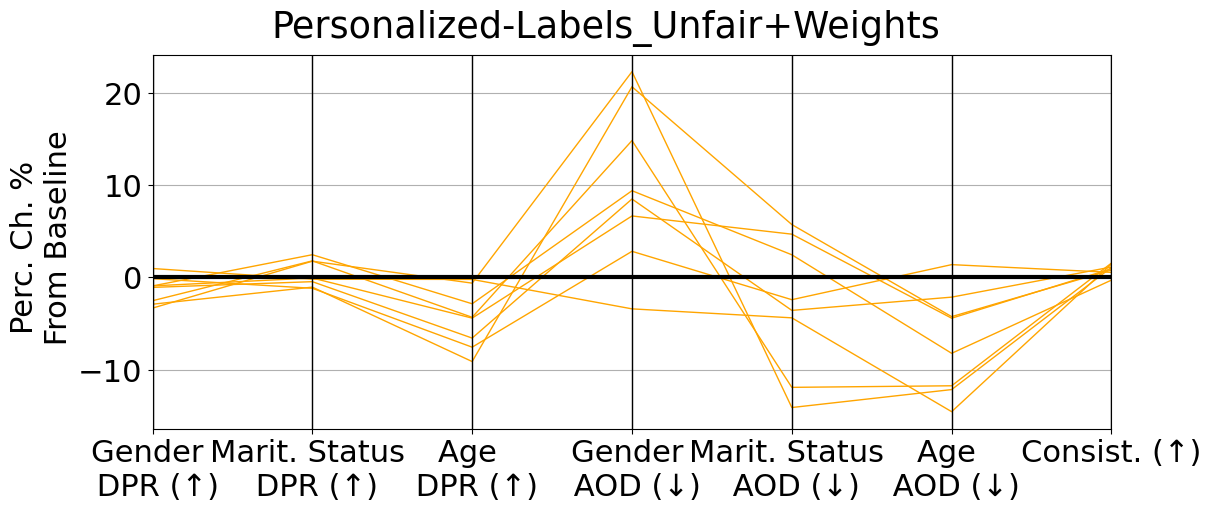

In [13]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

cma_subset = cma_perc_change_df_lw.loc[cma_perc_change_df_lw['participant_id'].isin(consist_p_ids)]
cma_subset = cma_subset[['CODE_GENDER_DemographicParityRatio',
                                    'NAME_FAMILY_STATUS_DemographicParityRatio',
                                    'AGE_DemographicParityRatio',
                                    'CODE_GENDER_AverageOddsDifference',
                                    'NAME_FAMILY_STATUS_AverageOddsDifference',
                                    'AGE_AverageOddsDifference',
                                   'consistency']]
cma_subset['class'] = [0]*len(cma_subset)

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(12, 5), layout="constrained")
fig.suptitle('Personalized-Labels_Unfair+Weights')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5,6],[0,0,0,0,0,0,0], color='black',lw=3)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 
                           'Marit. Status \n DPR (↑)',
                           'Age \n DPR (↑)',
                           'Gender \n AOD (↓)', 
                           'Marit. Status \n AOD (↓)',
                           'Age \n AOD (↓)',
                          'Consist. (↑)'])
axes.get_legend().remove()
##
file_name = 'parallelCoordGraph_consistency_personalized-Labels_Unfair+Weights_CMA.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels_Unfair+Weights\\figures\\"+file_name, dpi=300)
plt.show()

#### Parallel Coordinate Counterfactual ("People will be treated the same whether they are protected by law (e.g. gender, age, etc.) or not")

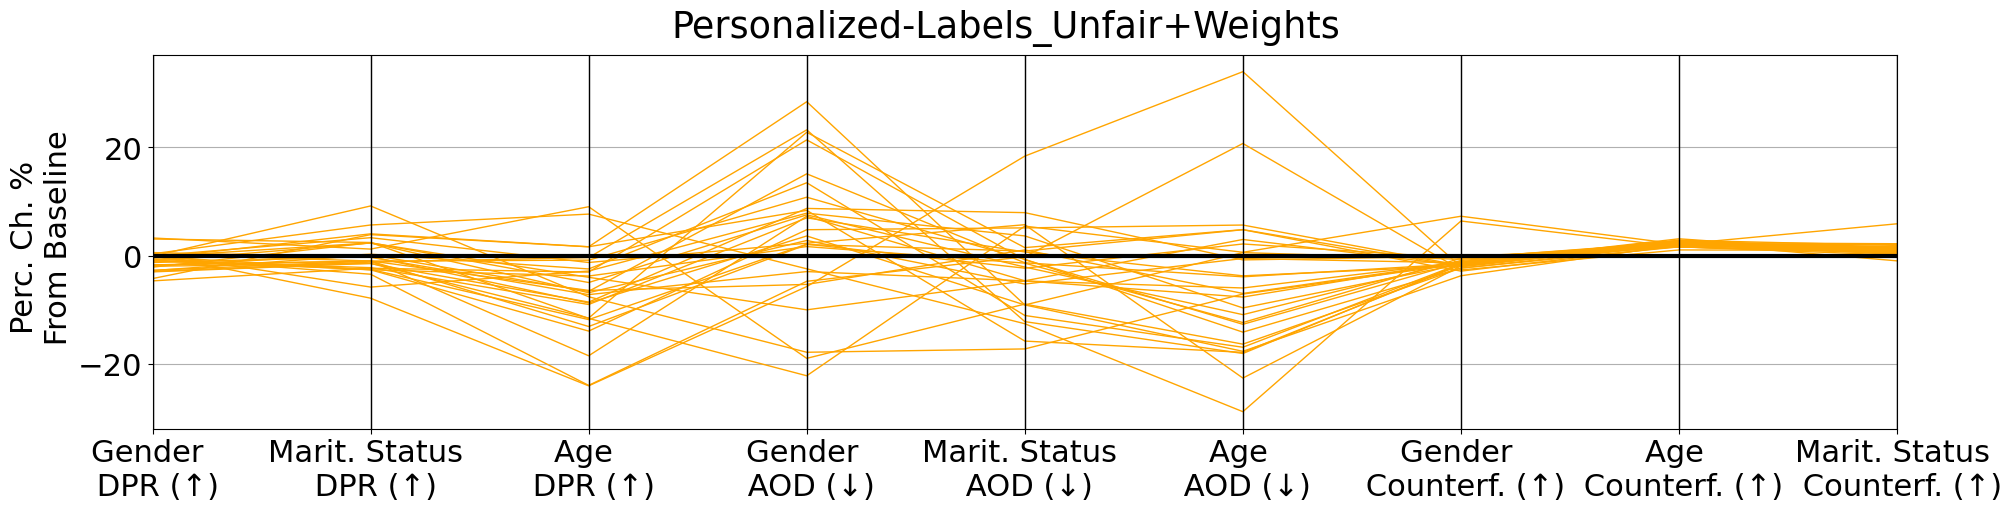

In [14]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

cma_subset = cma_perc_change_df_lw.loc[cma_perc_change_df_lw['participant_id'].isin(counterf_p_ids)]
cma_subset = cma_subset[['CODE_GENDER_DemographicParityRatio',
                                    'NAME_FAMILY_STATUS_DemographicParityRatio',
                                    'AGE_DemographicParityRatio',
                                    'CODE_GENDER_AverageOddsDifference',
                                    'NAME_FAMILY_STATUS_AverageOddsDifference',
                                    'AGE_AverageOddsDifference',
                                   'counterfactual_CODE_GENDER',
                                   'counterfactual_AGE',
                                   'counterfactual_NAME_FAMILY_STATUS']]
cma_subset['class'] = [0]*len(cma_subset)

matplotlib.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 1, figsize=(20, 5), layout="constrained")
fig.suptitle('Personalized-Labels_Unfair+Weights')
# Make the plot
ax = parallel_coordinates(cma_subset, 'class', color=['orange'],ax=axes,lw=1)
ax.plot([0,1,2,3,4,5,6,7,8],[0,0,0,0,0,0,0,0,0], color='black',lw=3)
axes.set_ylabel('Perc. Ch. % \n From Baseline')
axes.xaxis.set_ticklabels(['Gender \n DPR (↑)', 
                           'Marit. Status \n DPR (↑)',
                           'Age \n DPR (↑)',
                           'Gender \n AOD (↓)', 
                           'Marit. Status \n AOD (↓)',
                           'Age \n AOD (↓)',
                          'Gender \n Counterf. (↑)',
                          'Age \n Counterf. (↑)',
                          'Marit. Status \n Counterf. (↑)'])
axes.get_legend().remove()
##
file_name = 'parallelCoordGraph_counterfactual_personalized-Labels_Unfair+Weights_CMA.jpg'
fig.savefig(folder+"data\\results\\personalized\\Labels_Unfair+Weights\\figures\\"+file_name, dpi=300)
plt.show()